In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random as ran
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn')

#plt.style.available

# Load data :

### JAFFE

In [33]:
jaffe_X = pd.read_csv("jaffeX.csv",delimiter=";")
jaffe_y = pd.read_csv("jaffeY.csv",delimiter=";")

In [34]:
jaffe_y = pd.get_dummies(jaffe_y.values.reshape([jaffe_y.shape[1]])).values +0.
jaffe_X = jaffe_X.values/255

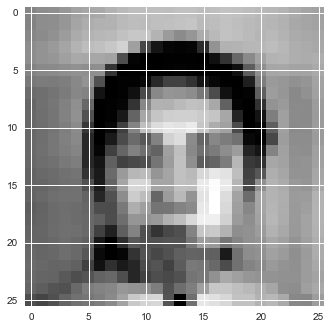

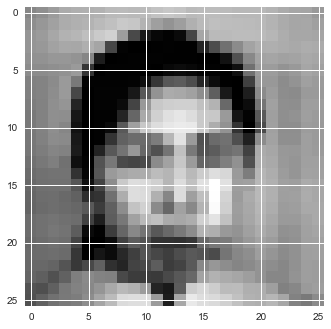

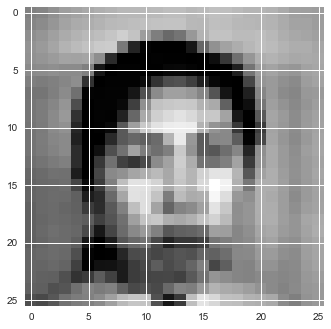

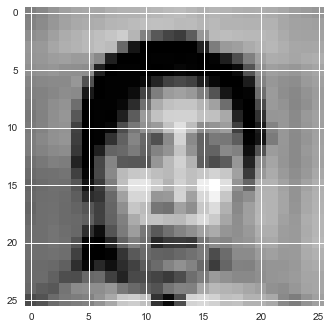

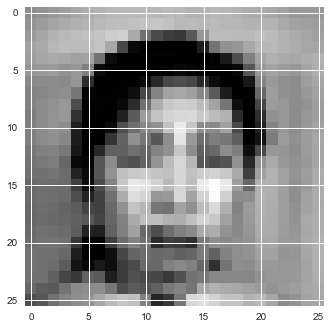

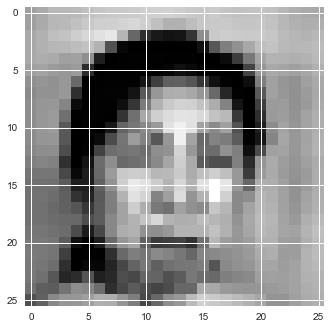

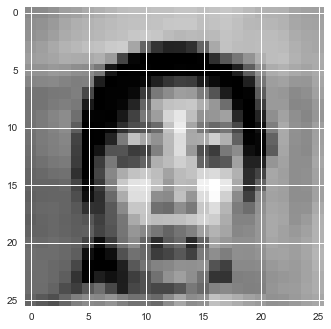

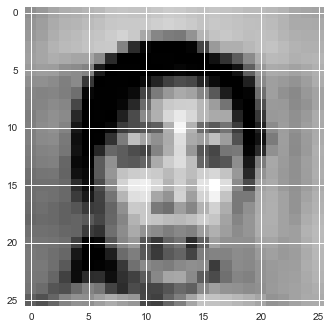

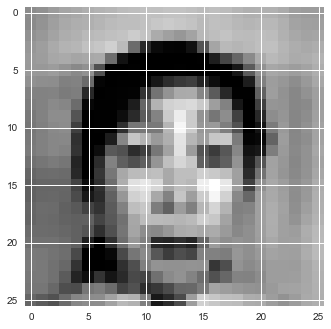

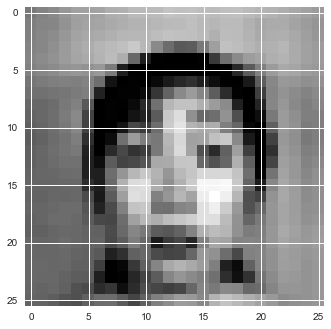

In [35]:
# Affichage d'un exemple d'image

for i in range(10):

    img = jaffe_X[i].reshape([26,26])
    plt.imshow(img.transpose(),cmap="gray")
    plt.show()

In [36]:
# RANDOM SPLIT JAFFE DATASET

X_train, X_test, y_train, y_test = train_test_split( jaffe_X, jaffe_y, test_size=0.25, random_state=42)

print("Number of samples in training set : ",X_train.shape[0])
print("Number of samples in test set : ",X_test.shape[0])

Number of samples in training set :  159
Number of samples in test set :  54


In [37]:
currentdata = "Jaffe"
dim = 26
shape = X_train.shape[1]

### MNIST

In [3]:
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_data = mnist.train.images
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Instructions for updating:
Please use tf.data.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
train_labels = pd.get_dummies(train_labels.reshape(len(train_labels))).values +0.
eval_labels = pd.get_dummies(eval_labels.reshape(len(eval_labels))).values +0.

In [5]:
# RANDOM SPLIT MNIST DATASET

X_train, X_test, y_train, y_test = train_test_split( train_data, train_labels, test_size=0.25, random_state=42)

print("Number of samples in training set : ",X_train.shape[0])
print("Number of samples in test set : ",X_test.shape[0])

Number of samples in training set :  41250
Number of samples in test set :  13750


In [6]:
currentdata = "MNIST"
dim = 28

shape = X_train.shape[1]

# Neural network with Random initialisation

In [38]:
# CREATION DU RESEAU DE NEURONE

sess.close()
sess = tf.Session()

x = tf.placeholder(tf.float32, shape=[None, shape])

# XAVIER INITIALIZER
initializer =  tf.contrib.layers.xavier_initializer()

# NORMAL DISTRIBUTION
#initializer = tf.random_normal_initializer()

# ZEROS INITIALIZER
#initializer = tf.zeros


W1 = tf.Variable(initializer([shape,100]))
b1 = tf.Variable(initializer([100]))

y1 = tf.nn.sigmoid(tf.add(tf.matmul(x,W1),b1))

W2 = tf.Variable(initializer([100,50]))
b2 = tf.Variable(initializer([50]))

y2 = tf.nn.sigmoid(tf.add(tf.matmul(y1,W2),b2))

W3 = tf.Variable(initializer([50,10]))
b3 = tf.Variable(initializer([10]))

y = tf.nn.softmax(tf.add(tf.matmul(y2,W3),b3))

y_ = tf.placeholder(tf.float32, shape=[None, 10])

cross_entropy = -tf.reduce_mean(tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1 - y), axis=1))



LEARNING_RATE = 0.1

training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(tf.global_variables_initializer())

In [ ]:
# TRAINING : 

acs = []
ls = []

number_of_epoch = 1000

for i in range(number_of_epoch):
    ac = sess.run(accuracy,feed_dict={x : X_test, y_ : y_test})
    l = sess.run(cross_entropy,feed_dict={x : X_train, y_ : y_train})
    sess.run(training,feed_dict={x : X_train, y_ : y_train})
    acs.append(ac)
    ls.append(l)
    if(i%10 == 0):
        print("epoch : ", i, "/", number_of_epoch, end=", ")
        print("accuracy : " , ac, end=", ")
        print("loss : ",l , end=", ")
        
plt.plot(acs)
plt.show()

plt.plot(ls)
plt.show()

In [39]:
init1 = tf.contrib.layers.xavier_initializer()
init2 = tf.random_normal_initializer()
init3 = tf.zeros
inits = [init1, init2, init3]

acsList = []
lsList = []
initsS = ["xavier", "distribution normal", "zéro"]

for initializer, title in zip(inits, initsS):

    print(title)
    
    try:
        sess.close()
    except NameError:
        sess = None
    # CREATION DU RESEAU DE NEURONE
    sess = tf.Session()

    x = tf.placeholder(tf.float32, shape=[None, shape])

    # XAVIER INITIALIZER
    #initializer =  tf.contrib.layers.xavier_initializer()

    # NORMAL DISTRIBUTION
    #initializer = tf.random_normal_initializer()

    # ZEROS INITIALIZER
    #initializer = tf.zeros

    W1 = tf.Variable(initializer([shape,100]))
    b1 = tf.Variable(initializer([100]))

    y1 = tf.nn.sigmoid(tf.add(tf.matmul(x,W1),b1))

    W2 = tf.Variable(initializer([100,50]))
    b2 = tf.Variable(initializer([50]))

    y2 = tf.nn.sigmoid(tf.add(tf.matmul(y1,W2),b2))

    W3 = tf.Variable(initializer([50,10]))
    b3 = tf.Variable(initializer([10]))

    y = tf.nn.softmax(tf.add(tf.matmul(y2,W3),b3))

    y_ = tf.placeholder(tf.float32, shape=[None, 10])

    cross_entropy = -tf.reduce_mean(tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1 - y), axis=1))

    LEARNING_RATE = 0.1

    training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)

    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    sess.run(tf.global_variables_initializer())


    # TRAINING : 

    acs = []
    ls = []

    number_of_epoch = 1000

    for i in range(number_of_epoch):
        ac = sess.run(accuracy,feed_dict={x : X_test, y_ : y_test})
        l = sess.run(cross_entropy,feed_dict={x : X_train, y_ : y_train})
        sess.run(training,feed_dict={x : X_train, y_ : y_train})
        acs.append(ac)
        ls.append(l)
        if(i%10 == 0):
            print("epoch : ", i, "/", number_of_epoch, end=", ")
            print("accuracy : " , ac, end=", ")
            print("loss : ",l )
    acsList.append(acs)
    lsList.append(ls)

xavier
epoch :  0 / 1000, accuracy :  0.11111111, loss :  3.6187284
epoch :  10 / 1000, accuracy :  0.11111111, loss :  3.2481475
epoch :  20 / 1000, accuracy :  0.11111111, loss :  3.231921
epoch :  30 / 1000, accuracy :  0.12962963, loss :  3.2241242
epoch :  40 / 1000, accuracy :  0.14814815, loss :  3.2166195
epoch :  50 / 1000, accuracy :  0.14814815, loss :  3.2088835
epoch :  60 / 1000, accuracy :  0.16666667, loss :  3.20081
epoch :  70 / 1000, accuracy :  0.16666667, loss :  3.1923182
epoch :  80 / 1000, accuracy :  0.16666667, loss :  3.1833236
epoch :  90 / 1000, accuracy :  0.18518518, loss :  3.173731
epoch :  100 / 1000, accuracy :  0.22222222, loss :  3.1634333
epoch :  110 / 1000, accuracy :  0.25925925, loss :  3.1523027
epoch :  120 / 1000, accuracy :  0.2777778, loss :  3.1401906
epoch :  130 / 1000, accuracy :  0.2962963, loss :  3.126924
epoch :  140 / 1000, accuracy :  0.2962963, loss :  3.112302
epoch :  150 / 1000, accuracy :  0.2962963, loss :  3.0960982
epoch 

epoch :  340 / 1000, accuracy :  0.962963, loss :  0.16158855
epoch :  350 / 1000, accuracy :  0.962963, loss :  0.15458202
epoch :  360 / 1000, accuracy :  0.962963, loss :  0.14811663
epoch :  370 / 1000, accuracy :  0.962963, loss :  0.14213704
epoch :  380 / 1000, accuracy :  0.962963, loss :  0.13659333
epoch :  390 / 1000, accuracy :  0.962963, loss :  0.1314411
epoch :  400 / 1000, accuracy :  0.962963, loss :  0.12664144
epoch :  410 / 1000, accuracy :  0.962963, loss :  0.12216006
epoch :  420 / 1000, accuracy :  0.962963, loss :  0.11796697
epoch :  430 / 1000, accuracy :  0.962963, loss :  0.11403572
epoch :  440 / 1000, accuracy :  0.962963, loss :  0.110343166
epoch :  450 / 1000, accuracy :  0.962963, loss :  0.106868826
epoch :  460 / 1000, accuracy :  0.962963, loss :  0.1035945
epoch :  470 / 1000, accuracy :  0.962963, loss :  0.100503884
epoch :  480 / 1000, accuracy :  0.962963, loss :  0.09758264
epoch :  490 / 1000, accuracy :  0.962963, loss :  0.09481767
epoch :

epoch :  660 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  670 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  680 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  690 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  700 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  710 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  720 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  730 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  740 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  750 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  760 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  770 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  780 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  790 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  800 / 1000, accuracy :  0.074074075, loss :  3.2431955
epoch :  810 / 1000, accuracy :  0.07407

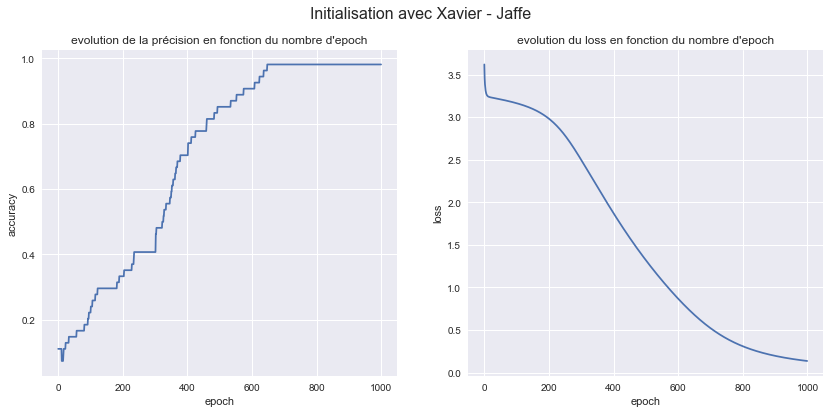

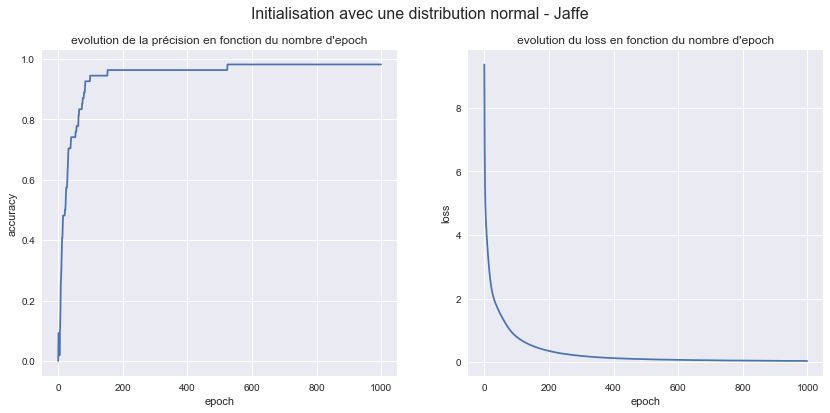

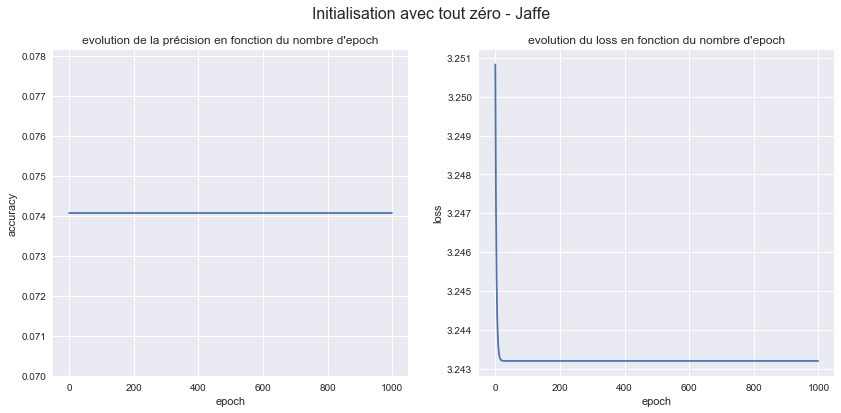

In [41]:
titles = ["Initialisation avec Xavier - "+currentdata,
          "Initialisation avec une distribution normal - "+currentdata,
          "Initialisation avec tout zéro - "+currentdata]

for acs, ls, title in zip(acsList, lsList, titles):
    plt.figure(figsize=(14, 6))

    ax = plt.subplot(121)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False) 

    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()

    plt.plot(acs)

    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.title("evolution de la précision en fonction du nombre d'epoch")

    ax = plt.subplot(122)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False) 

    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()

    plt.plot(ls)

    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("evolution du loss en fonction du nombre d'epoch")

    plt.suptitle(title, size=16)

    #plt.tight_layout()
    #plt.show()
    plt.savefig("plot/"+title+".svg", bbox_inches='tight')
    

In [42]:
sess.close()

# AUTO ENCODER

In [43]:
sess = tf.Session()

learning_rate = 0.01

initializer = tf.contrib.layers.xavier_initializer()


X = tf.placeholder(tf.float32, shape=[None, shape])

# encoder layers : 

w1 = tf.Variable(initializer([shape, 100]))
b1 = tf.Variable(initializer([100]))

layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(X, w1),b1))

w2 = tf.Variable(initializer([100, 50]))
b2 = tf.Variable(initializer([50]))

layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, w2),b2))

# decoder layers : 

w3 = tf.Variable(initializer([50, 100]))
b3 = tf.Variable(initializer([100]))

layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, w3),b3))

w4 = tf.Variable(initializer([100, shape]))
b4 = tf.Variable(initializer([shape]))

y_pred = tf.nn.sigmoid(tf.add(tf.matmul(layer_3, w4),b4))

y_true = X

loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

loss :  0.061241746
loss :  0.061181273
loss :  0.061079063
loss :  0.060906537
loss :  0.060615998
loss :  0.060128618
loss :  0.05931636
loss :  0.057977565
loss :  0.05581164
loss :  0.052415356
loss :  0.04736101
loss :  0.040470168
loss :  0.032382578
loss :  0.025091501
loss :  0.020883735
loss :  0.019536354
loss :  0.019218434
loss :  0.019124676
loss :  0.01909096
loss :  0.019075286
loss :  0.019062363
loss :  0.019044824
loss :  0.019479394
loss :  0.019664433
loss :  0.019919008
loss :  0.01954522
loss :  0.018991912
loss :  0.018533008
loss :  0.017728634
loss :  0.021166686
loss :  0.014811788
loss :  0.018552668
loss :  0.014196337
loss :  0.0143229645
loss :  0.0189151
loss :  0.012857833
loss :  0.012191671
loss :  0.014510849
loss :  0.011943168
loss :  0.012394053
loss :  0.01012226
loss :  0.012757113
loss :  0.013174399
loss :  0.0083492305
loss :  0.00882374
loss :  0.00747204
loss :  0.008500422
loss :  0.0072575375
loss :  0.007012022
loss :  0.006699561
loss : 

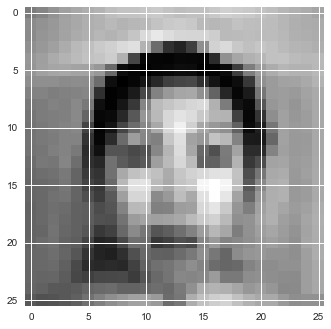

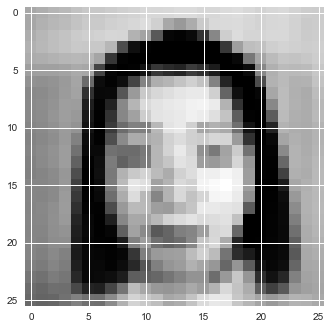

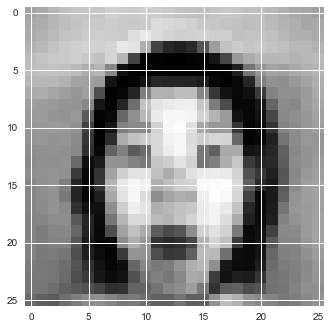

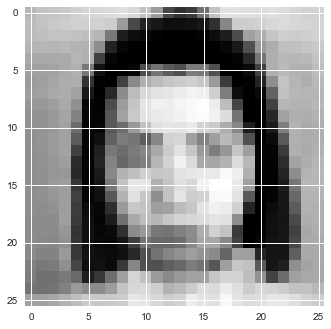

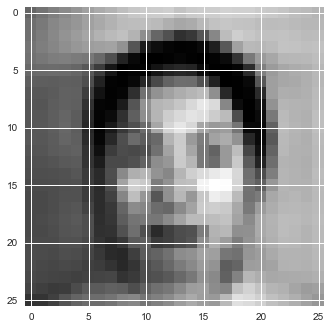

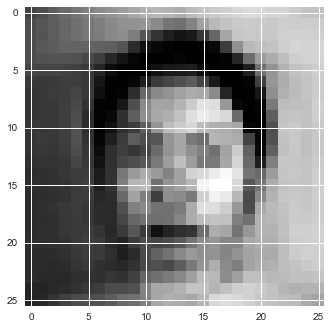

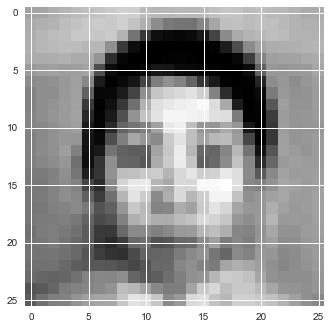

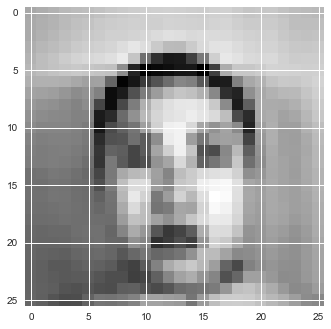

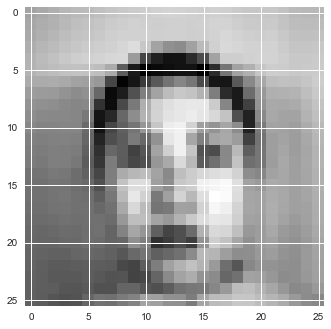

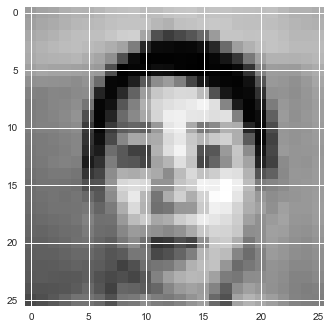

In [44]:
for i in range(1000):

    sess.run(optimizer,feed_dict={X : X_train})
    l = sess.run(loss,feed_dict={X : X_train} )
    if i % 10 == 0 : 
        print("loss : ", l)

img_reconstructed = sess.run(y_pred, feed_dict={X : X_test})

# SHOW 10 reconstructed images :

for i in range(10):
    image = img_reconstructed[i].reshape([dim,dim])
    plt.imshow(image.transpose(),cmap = "gray")
    plt.show()

## Training with autoencoder initialisation

In [45]:
# CREATION DU RESEAU DE NEURONE
sess.close()
sess = tf.Session()

x = tf.placeholder(tf.float32, shape=[None, shape])

# XAVIER INITIALIZER
initializer =  tf.contrib.layers.xavier_initializer()

W1 = w1
B1 = b1

y1 = tf.nn.sigmoid(tf.add(tf.matmul(x,W1),B1))

W2 = w2
B2 = b2

y2 = tf.nn.sigmoid(tf.add(tf.matmul(y1,W2),B2))

W3 = tf.Variable(initializer([50,10]))
B3 = tf.Variable(initializer([10]))

y = tf.nn.softmax(tf.add(tf.matmul(y2,W3),B3))

y_ = tf.placeholder(tf.float32, shape=[None, 10])

cross_entropy = -tf.reduce_mean(tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1 - y), axis=1))


LEARNING_RATE = 0.1

training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(tf.global_variables_initializer())

In [46]:
# TRAINING : 

acs_AE = []
ls_AE = []

number_of_epoch = 1000

for i in range(number_of_epoch):
    ac = sess.run(accuracy,feed_dict={x : X_test, y_ : y_test})
    l = sess.run(cross_entropy,feed_dict={x : X_train, y_ : y_train})
    sess.run(training,feed_dict={x : X_train, y_ : y_train})
    acs_AE.append(ac)
    ls_AE.append(l)
    if(i%10 == 0):
        print("epoch : ", i, "/", number_of_epoch, end=", ")
        print("accuracy : " , ac, end=", ")
        print("loss : ",l )


epoch :  0 / 1000, accuracy :  0.074074075, loss :  3.486058
epoch :  10 / 1000, accuracy :  0.11111111, loss :  3.2379334
epoch :  20 / 1000, accuracy :  0.074074075, loss :  3.2256615
epoch :  30 / 1000, accuracy :  0.074074075, loss :  3.2173367
epoch :  40 / 1000, accuracy :  0.074074075, loss :  3.2088993
epoch :  50 / 1000, accuracy :  0.11111111, loss :  3.2001536
epoch :  60 / 1000, accuracy :  0.12962963, loss :  3.1910071
epoch :  70 / 1000, accuracy :  0.12962963, loss :  3.1813645
epoch :  80 / 1000, accuracy :  0.18518518, loss :  3.171121
epoch :  90 / 1000, accuracy :  0.24074075, loss :  3.1601596
epoch :  100 / 1000, accuracy :  0.25925925, loss :  3.1483493
epoch :  110 / 1000, accuracy :  0.2777778, loss :  3.1355422
epoch :  120 / 1000, accuracy :  0.2962963, loss :  3.1215718
epoch :  130 / 1000, accuracy :  0.2962963, loss :  3.1062493
epoch :  140 / 1000, accuracy :  0.2962963, loss :  3.0893624
epoch :  150 / 1000, accuracy :  0.3148148, loss :  3.07067
epoch : 

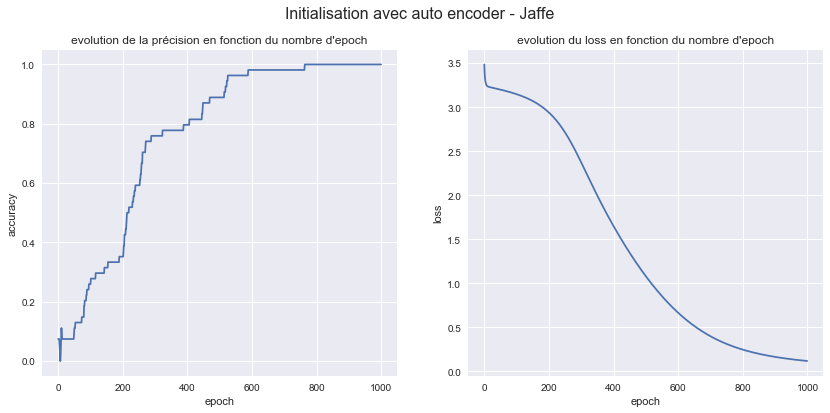

In [48]:
title = "Initialisation avec auto encoder - "+currentdata

plt.figure(figsize=(14, 6))

ax = plt.subplot(121)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.plot(acs_AE)

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("evolution de la précision en fonction du nombre d'epoch")


ax = plt.subplot(122)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.plot(ls_AE)

plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("evolution du loss en fonction du nombre d'epoch")

plt.suptitle(title, size=16)

#plt.tight_layout()
#plt.show()
plt.savefig("plot/"+title+".png", bbox_inches='tight')

In [49]:
sess.close()

# PCA initialisation : 

In [50]:
# fir

data = X_train.copy()

m = data.mean(axis = 0 )
#data -= data.mean(axis = 0 )
cov = np.cov(data,rowvar=False)
evals , evecs = np.linalg.eigh(cov)

idx = np.argsort(evals)[::-1]
R = evecs[:,idx]
inertia = evals[idx]

Rm =np.dot(m,R)
respca = np.dot(data, R) - Rm

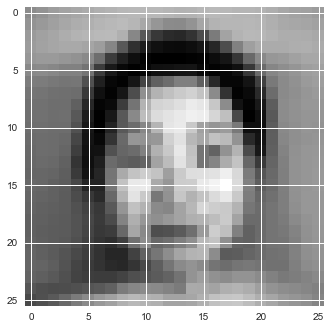

In [51]:
plt.imshow(np.dot(respca,np.linalg.inv(R) + m )[100].reshape([dim,dim]).T,cmap = "gray")
plt.show()

In [52]:
# Second PCA

data = respca.copy()
m2 = data.mean(axis = 0 )

cov = np.cov(data,rowvar=False)
evals , evecs = np.linalg.eigh(cov)

idx = np.argsort(evals)[::-1]
R2 = evecs[:,idx]
inertia = evals[idx]

Rm2 =np.dot(m,R)
respca = np.dot(data, R) - Rm2

reconstructed = np.linalg.inv(R) + m2

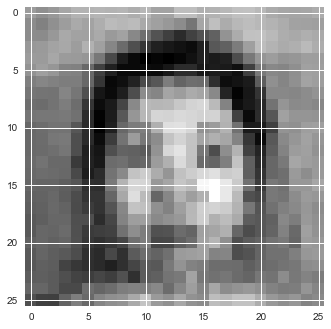

In [53]:
one = (np.dot(np.linalg.inv(R2),reconstructed) + m)[126].reshape([dim,dim])
plt.imshow(one.T,cmap ="gray")
plt.show()

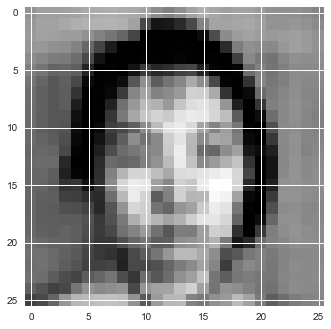

In [54]:
plt.imshow(X_train[25].reshape([dim,dim]).T,cmap= "gray")
plt.show()

In [55]:
# CONVERT TO FLOAT32

R = np.array(R,dtype="float32")[:,:100]
R2 = np.array(R2,dtype="float32")[:100,:50]
Rm = np.array(Rm,dtype="float32")[:100]
Rm2 = np.array(Rm2,dtype="float32")[:50]


In [56]:
R.shape

(676, 100)

## INITIALISATION WITH PCA

In [57]:
# CREATION DU RESEAU DE NEURONE
sess.close()
sess = tf.Session()

x = tf.placeholder(tf.float32, shape=[None, shape])

# XAVIER INITIALIZER
initializer =  tf.contrib.layers.xavier_initializer()

W1 = tf.Variable(R)
B1 = tf.Variable((-Rm))

y1 = tf.nn.sigmoid(tf.add(tf.matmul(x,W1),B1))

W2 = tf.Variable(R2)
B2 = tf.Variable(-Rm2)

y2 = tf.nn.sigmoid(tf.add(tf.matmul(y1,W2),B2))

W3 = tf.Variable(initializer([50,10]))
B3 = tf.Variable(initializer([10]))

y = tf.nn.softmax(tf.add(tf.matmul(y2,W3),B3))

y_ = tf.placeholder(tf.float32, shape=[None, 10])

cross_entropy = -tf.reduce_mean(tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1 - y), axis=1))


LEARNING_RATE = 0.1

training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(tf.global_variables_initializer())

In [58]:
# TRAINING : 

acs_PCA = []
ls_PCA = []

number_of_epoch = 1000

for i in range(number_of_epoch):
    ac = sess.run(accuracy,feed_dict={x : X_test, y_ : y_test})
    l = sess.run(cross_entropy,feed_dict={x : X_train, y_ : y_train})
    sess.run(training,feed_dict={x : X_train, y_ : y_train})
    acs_PCA.append(ac)
    ls_PCA.append(l)
    if(i%10 == 0):
        print("epoch : ", i, "/", number_of_epoch, end=', ')
        print("accuracy : " , ac, end=', ')
        print("loss : ",l )


epoch :  0 / 1000, accuracy :  0.09259259, loss :  3.7105958
epoch :  10 / 1000, accuracy :  0.074074075, loss :  3.2431567
epoch :  20 / 1000, accuracy :  0.11111111, loss :  3.2215035
epoch :  30 / 1000, accuracy :  0.11111111, loss :  3.213189
epoch :  40 / 1000, accuracy :  0.12962963, loss :  3.2050066
epoch :  50 / 1000, accuracy :  0.12962963, loss :  3.196613
epoch :  60 / 1000, accuracy :  0.12962963, loss :  3.1879535
epoch :  70 / 1000, accuracy :  0.14814815, loss :  3.1789756
epoch :  80 / 1000, accuracy :  0.18518518, loss :  3.16962
epoch :  90 / 1000, accuracy :  0.2037037, loss :  3.1598184
epoch :  100 / 1000, accuracy :  0.24074075, loss :  3.1494923
epoch :  110 / 1000, accuracy :  0.25925925, loss :  3.138551
epoch :  120 / 1000, accuracy :  0.25925925, loss :  3.1268904
epoch :  130 / 1000, accuracy :  0.2777778, loss :  3.1143956
epoch :  140 / 1000, accuracy :  0.2962963, loss :  3.1009386
epoch :  150 / 1000, accuracy :  0.2962963, loss :  3.0863771
epoch :  16

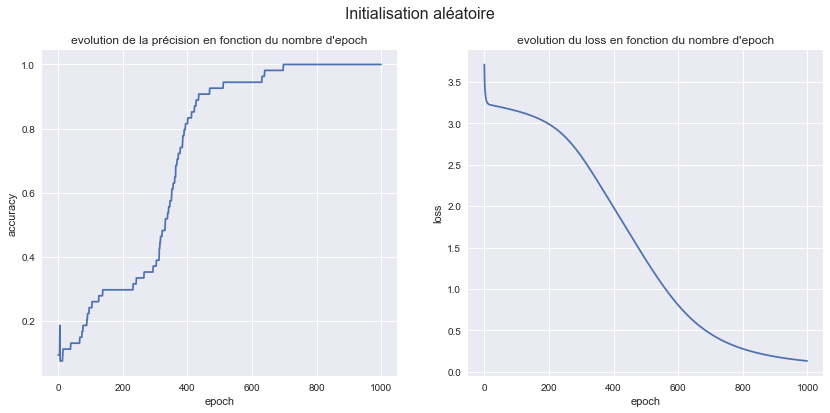

In [60]:
title = "Initialisation avec PCA - "+currentdata

plt.figure(figsize=(14, 6))

ax = plt.subplot(121)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.plot(acs_PCA)

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("evolution de la précision en fonction du nombre d'epoch")


ax = plt.subplot(122)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.plot(ls_PCA)

plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("evolution du loss en fonction du nombre d'epoch")

plt.suptitle("Initialisation aléatoire", size=16)

#plt.tight_layout()
#plt.show()
plt.savefig("plot/"+title+".png", bbox_inches='tight')


In [61]:
sess.close()

# plot poster

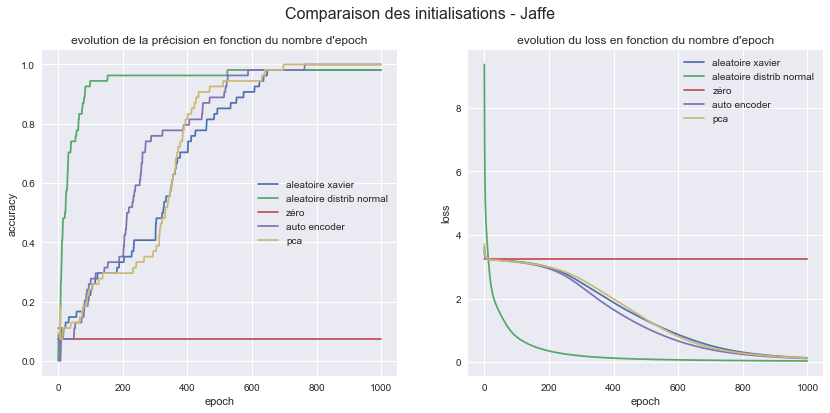

In [63]:
title = "Comparaison des initialisations - "+currentdata

plt.figure(figsize=(14, 6))

ax = plt.subplot(121)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()



plt.plot(acsList[0], label="aleatoire xavier")
plt.plot(acsList[1], label="aleatoire distrib normal")
plt.plot(acsList[2], label="zéro")
plt.plot(acs_AE, label="auto encoder")
plt.plot(acs_PCA, label="pca")

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("evolution de la précision en fonction du nombre d'epoch")
plt.legend()


ax = plt.subplot(122)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.plot(lsList[0], label="aleatoire xavier")
plt.plot(lsList[1], label="aleatoire distrib normal")
plt.plot(lsList[2], label="zéro")
plt.plot(ls_AE, label="auto encoder")
plt.plot(ls_PCA, label="pca")

plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("evolution du loss en fonction du nombre d'epoch")
plt.legend()

plt.suptitle(title, size=16)

#plt.tight_layout()
#plt.show()
plt.savefig("plot/"+title+".png", bbox_inches='tight')
